In [1]:
#importing necessary libraries

from sklearn.metrics         import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes     import GaussianNB
from sklearn.datasets        import load_breast_cancer

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
#Loading the cancer data set from sklearn datasets

lv_cancer = load_breast_cancer()

lv_cancer_df = pd.DataFrame(lv_cancer.data)
print(lv_cancer_df.head())

      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  
0  0.4601  0.11890  
1 

In [5]:
#Training ,test dataset for dependent and independent variables

lv_x_train,lv_x_test,lv_y_train,lv_y_test = train_test_split(lv_cancer.data,
                                                            lv_cancer.target,
                                                            random_state = 0 )

In [6]:
#Developing a naive bayes model for training data set

lv_naive_cancer = GaussianNB()
lv_naive_cancer.fit(lv_x_train,lv_y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
#Predicting probabilities for test dataset of independent variables

lv_cancer_probs = lv_naive_cancer.predict_proba(lv_x_test)

#Considering probabilities for the positive outcome only
lv_cancer_probs = lv_cancer_probs[:,1]

In [8]:
#Calculate ROC scores from original data and predicted probabilities

lv_cancer_auc = roc_auc_score(lv_y_test,lv_cancer_probs)

In [10]:
#Determine false positive and true positive rate from ROC Curve

lv_cancer_fpr ,lv_cancer_tpr, _ = roc_curve(lv_y_test,lv_cancer_probs)

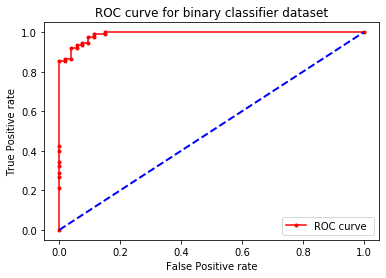

0.990146750524109


In [22]:
#Plot the ROC Curve for the model

plt.plot(lv_cancer_fpr,lv_cancer_tpr,color = "red", marker = '.',label = 'ROC curve ',)

#Plot the straight line for the model
plt.plot([0,1],[0,1],color = 'blue',lw = 2,linestyle = '--')

#Defining the axis labels and title
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title("ROC curve for binary classifier dataset")

#Display the legend in lower right corner
plt.legend(loc = "lower right")

#Display the plot
plt.show()

print(lv_cancer_auc)